In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2,3)]
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron()
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
fashion_mnist =  keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
X_train_full.dtype

dtype('uint8')

In [5]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000] , y_train_full[5000:]
X_test = X_test/255.0

In [6]:
class_names = ["T-shirt/top", "Trouser", "Pullover","Dress","Coat","Sandal","Shirt","Sneaker","bas","Ankle boot"]

In [7]:
class_names[y_train[0]]

'Coat'

In [8]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [9]:
### 위와 동일

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [10]:
from keras.layers import Dense
output_layer = Dense(10)

In [11]:
output_layer

In [12]:
from tensorflow.keras.layers import Dense
output_layer = Dense(10)

In [13]:
output_layer

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.layers

In [16]:
hidden1 = model.layers[1]
hidden1.name

'dense_3'

In [18]:
model.get_layer("dense_3") is hidden1

True

In [19]:
weights, biases = hidden1.get_weights()

In [20]:
weights

array([[ 0.06896953, -0.04273922, -0.03670045, ..., -0.04591834,
         0.04372988, -0.06563983],
       [-0.06272614,  0.0666737 , -0.00310272, ...,  0.04052385,
        -0.03650998,  0.03086516],
       [-0.07188664, -0.054364  , -0.05090344, ...,  0.00761522,
        -0.0160281 ,  0.00596141],
       ...,
       [-0.03989203, -0.00396182, -0.02012427, ...,  0.03199066,
        -0.06681553, -0.03458154],
       [-0.00129953,  0.01262167,  0.03626782, ...,  0.07029045,
         0.02646699, -0.05517695],
       [ 0.04918542,  0.06801476, -0.03714413, ..., -0.00117724,
        -0.03635222, -0.06447135]], dtype=float32)

In [21]:
### 첫번쨰 층인 784입력층에 300개 은닝층에 대한 가중치이므로 784 * 300

weights.shape

(784, 300)

In [24]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [25]:
biases.shape

(300,)

In [33]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

In [34]:
### validation_data에 Valid셋을 넣는것 보다는 0.1같은 비율을 넣어 나눠주는게 더 편함

history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.7165 - accuracy: 0.7640 - val_loss: 0.4947 - val_accuracy: 0.8342
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4885 - accuracy: 0.8292 - val_loss: 0.4570 - val_accuracy: 0.8422
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4427 - accuracy: 0.8434 - val_loss: 0.4145 - val_accuracy: 0.8602
Epoch 4/30
1719/1719 [==============================] - 2s 983us/step - loss: 0.4139 - accuracy: 0.8545 - val_loss: 0.4113 - val_accuracy: 0.8554
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3940 - accuracy: 0.8613 - val_loss: 0.3932 - val_accuracy: 0.8566
Epoch 6/30
1719/1719 [==============================] - 2s 986us/step - loss: 0.3772 - accuracy: 0.8669 - val_loss: 0.3750 - val_accuracy: 0.8652
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3644 - accuracy: 0.8708 - val_loss: 0.3725 - val_accur

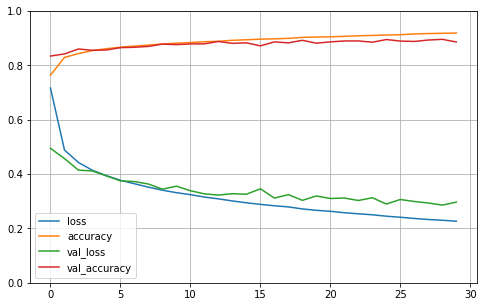

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [63]:
history.history["loss"]

[0.7165247201919556,
 0.48851701617240906,
 0.4426625370979309,
 0.41387805342674255,
 0.3939712941646576,
 0.37720268964767456,
 0.364431768655777,
 0.35186997056007385,
 0.3407135307788849,
 0.3315752446651459,
 0.3243638575077057,
 0.31539440155029297,
 0.3088454306125641,
 0.30113402009010315,
 0.29432302713394165,
 0.28848201036453247,
 0.28347450494766235,
 0.2791946232318878,
 0.2717621922492981,
 0.26668938994407654,
 0.26303061842918396,
 0.25778326392173767,
 0.2538503110408783,
 0.2501850426197052,
 0.24505120515823364,
 0.24122974276542664,
 0.23670296370983124,
 0.2328600287437439,
 0.2301638424396515,
 0.22671110928058624]

In [64]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 635us/step - loss: 0.3365 - accuracy: 0.8782


[0.33654338121414185, 0.8781999945640564]

In [65]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.98],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [78]:
### model.predict_classes함수와 같음

y_proba.argmax(axis=1)

array([9, 2, 1], dtype=int64)

In [81]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [83]:
###   input_shape매개변수 형태에 chk'

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 0s 741us/step - loss: 0.9621 - val_loss: 0.5162
Epoch 2/20
363/363 [==============================] - 0s 541us/step - loss: 0.5117 - val_loss: 0.4515
Epoch 3/20
363/363 [==============================] - 0s 569us/step - loss: 0.4778 - val_loss: 0.4547
Epoch 4/20
363/363 [==============================] - 0s 537us/step - loss: 0.4395 - val_loss: 0.4070
Epoch 5/20
363/363 [==============================] - 0s 539us/step - loss: 0.4306 - val_loss: 0.4396
Epoch 6/20
363/363 [==============================] - 0s 556us/step - loss: 0.4202 - val_loss: 0.4056
Epoch 7/20
363/363 [==============================] - 0s 564us/step - loss: 0.4117 - val_loss: 0.3831
Epoch 8/20
363/363 [==============================] - 0s 589us/step - loss: 0.4112 - val_loss: 0.3796
Epoch 9/20
363/363 [==============================] - 0s 610us/step - loss: 0.3980 - val_loss: 0.3927
Epoch 10/20
363/363 [==============================] - 0s 571us/step - loss: 0.440